Diego Marquez Franco





# Simulación de cadena de Markov

## 1. ¿Qué es una Cadena de Markov?

Una *cadena de Markov* es un tipo de proceso estocástico (aleatorio) que satisface la *propiedad de Markov*, es decir, la *memoria limitada o sin memoria*. Esto significa que la probabilidad de transición al siguiente estado depende únicamente del estado actual y no de los estados anteriores.

Formalmente, si tenemos una secuencia de variables aleatorias $X_0, X_1, X_2, \ldots$ que toman valores en un conjunto de estados finito o numerable $S$, la cadena de Markov cumple:

$$
P(X_{n+1} = j \mid X_n = i, X_{n-1} = i_{n-1}, \ldots, X_0 = i_0) = P(X_{n+1} = j \mid X_n = i).
$$

Esto significa que la **probabilidad de moverse al estado $j$ desde el estado actual $i$ depende solo de $i$ y $j$**.

## 2. Matriz de Transición

La *matriz de transición* es una matriz que contiene las probabilidades de transición entre los estados de la cadena de Markov. Si tenemos un conjunto finito de estados $S = \{1, 2, \ldots, N\}$, la matriz de transición $P$ es una matriz de tamaño $N \times N$ donde cada elemento $P_{ij}$ representa la probabilidad de transitar del estado $i$ al estado $j$ en un paso.

$$
P = \begin{pmatrix}
P_{11} & P_{12} & \cdots & P_{1N} \\
P_{21} & P_{22} & \cdots & P_{2N} \\
\vdots & \vdots & \ddots & \vdots \\
P_{N1} & P_{N2} & \cdots & P_{NN}
\end{pmatrix}.
$$

Cada elemento $P_{ij}$ debe cumplir:

$$
0 \leq P_{ij} \leq 1
$$

Y la suma de las probabilidades en cada fila debe ser 1:

$$
\sum_{j=1}^{N} P_{ij} = 1 \quad \text{para todo } i \in S.
$$

## 3. Matriz Estocástica

Una *matriz estocástica* (o matriz de probabilidad) es una matriz cuadrada no negativa en la que cada fila suma 1. En el contexto de las cadenas de Markov, la matriz de transición $P$ es una matriz estocástica.

### ¿Por qué usamos matrices estocásticas en cadenas de Markov?

- **Representación de probabilidades**: Las matrices estocásticas permiten representar las probabilidades de transición entre estados de manera estructurada.
- **Propiedades matemáticas**: Las matrices estocásticas tienen propiedades que facilitan el análisis y cálculo de las distribuciones de probabilidad a lo largo del tiempo.
- **Cálculo de distribuciones futuras**: Podemos utilizar álgebra matricial para calcular la distribución de probabilidades después de varios pasos.

## 4. Evolución de la Distribución de Estados a lo Largo del Tiempo

Sea $\pi^{(0)}=\left[\pi^{(0)}_1,\pi^{(0)}_2,\dots,\pi^{(0)}_i,\dots,\pi^{(0)}_k\right]$ un *vector de distribución inicial*, donde $\pi^{(0)}_i$ es la probabilidad de que el sistema esté en el estado $i$ en el tiempo $n = 0$.

Para calcular la distribución de probabilidades después de un paso($n=1$), $\pi^{(1)}$, utilizamos:

$$
\pi^{(1)} = \pi^{(0)} P.
$$

Para calcular la distribución después de $n$ pasos:

$$
\pi^{(n)} = \pi^{(0)} P^n.
$$

Donde $P^n$ es la matriz de transición elevada a la potencia $n$, es decir, el resultado de multiplicar la matriz $P$ consigo misma $n$ veces.

### Ejemplo:

Supongamos que tenemos una cadena de Markov con 3 estados y la siguiente matriz de transición:

$$
P = \begin{pmatrix}
0.5 & 0.3 & 0.2 \\
0.2 & 0.6 & 0.2 \\
0.3 & 0.3 & 0.4
\end{pmatrix}.
$$

Y una distribución inicial:

$$
\pi^{(0)} = (0.7, 0.2, 0.1).
$$

Para calcular la distribución después de 1 paso:

$$
\pi^{(1)} = \pi^{(0)} P = (0.7, 0.2, 0.1)
\begin{pmatrix}
0.5 & 0.3 & 0.2 \\
0.2 & 0.6 & 0.2 \\
0.3 & 0.3 & 0.4
\end{pmatrix}.
$$

Realizando la multiplicación:

$$
\pi_1^{(1)} = 0.7 \times 0.5 + 0.2 \times 0.2 + 0.1 \times 0.3 = 0.35 + 0.04 + 0.03 = 0.42
$$

$$
\pi_2^{(1)} = 0.7 \times 0.3 + 0.2 \times 0.6 + 0.1 \times 0.3 = 0.21 + 0.12 + 0.03 = 0.36
$$

$$
\pi_3^{(1)} = 0.7 \times 0.2 + 0.2 \times 0.2 + 0.1 \times 0.4 = 0.14 + 0.04 + 0.04 = 0.22.
$$

Por lo tanto, la distribución después de 1 paso es:

$$
\pi^{(1)} = (0.42, 0.36, 0.22).
$$

Para calcular la distribución después de 2 pasos:

$$
\pi^{(2)} = \pi^{(1)} P = \pi^{(0)} P^2.
$$

Y así sucesivamente para $n$ pasos.


- **Matriz de transición de $n$ pasos**: La matriz $P^n$ nos da las probabilidades de transitar del estado $i$ al estado $j$ en exactamente $n$ pasos.

  $$
  P_{ij}^n = P(\text{En } n \text{ pasos, transición de } i \text{ a } j)
  $$

- **Distribución estacionaria**: En cadenas de Markov ergódicas, existe una distribución estacionaria $\pi$ tal que:

  $$
  \pi = \pi P
  $$

  Esto significa que, a largo plazo, la distribución de estados no cambia al aplicar la matriz de transición.



## Implementación del ejemplo

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los estados
estados = [1, 2, 3]

# Matriz de transición P
P = np.array([
    [0.5, 0.3, 0.2],
    [0.2, 0.6, 0.2],
    [0.3, 0.3, 0.4]
])

# Verificar que cada fila suma 1
assert np.allclose(P.sum(axis=1), 1), "Las filas de P deben sumar 1"

# Distribución inicial pi_0
pi_0 = np.array([0.7, 0.2, 0.1])

def calcular_distribucion_n(pi_0, P, n):
    """
    Calcula la distribución de probabilidades después de n pasos.
    """
    P_n = np.linalg.matrix_power(P, n)
    pi_n = pi_0.dot(P_n)
    return pi_n


## Simulación de la cadena

In [9]:
def simular_cadena_markov(P, estado_inicial, pasos):
    """
    Simula la evolución de estados en una cadena de Markov.
    """
    estados_posibles = range(len(P))
    historial_estados = [estado_inicial]

    estado_actual = estado_inicial
    for _ in range(pasos):
        probabilidades = P[estado_actual]
        siguiente_estado = np.random.choice(estados_posibles, p=probabilidades)
        historial_estados.append(siguiente_estado)
        estado_actual = siguiente_estado

    return historial_estados


In [20]:
n = 500  # Número de pasos

# Calcular la distribución teórica en el tiempo n
pi_n_teorico = calcular_distribucion_n(pi_0, P, n)

print(f"Distribución teórica en el tiempo {n}:")
for i, prob in enumerate(pi_n_teorico):
    print(f"Estado {estados[i]}: {prob:.4f}")


Distribución teórica en el tiempo 500:
Estado 1: 0.3214
Estado 2: 0.4286
Estado 3: 0.2500


## Simulación de la Cadena $m$ Veces

Para aproximar la distribución en el tiempo $𝑛$ mediante simulación, ejecutaremos $𝑚$ simulaciones y contaremos la frecuencia de llegada a cada estado en el paso $𝑛$.

In [21]:
m = 1000 # Número de simulaciones
n = 500     # Número de pasos

# Inicializar conteo de visitas
conteo_estados = np.zeros(len(estados))

for _ in range(m):
    # Elegir estado inicial según pi_0
    estado_inicial = np.random.choice(len(estados), p=pi_0)
    # Simular la cadena
    historial = simular_cadena_markov(P, estado_inicial, n)
    # Contar el estado en el tiempo n
    estado_final = historial[-1]
    conteo_estados[estado_final] += 1

# Calcular frecuencias
frecuencias_simuladas = conteo_estados / m

print(f"\nDistribución simulada en el tiempo {n}:")
for i, freq in enumerate(frecuencias_simuladas):
    print(f"Estado {estados[i]}: {freq:.4f}")



Distribución simulada en el tiempo 500:
Estado 1: 0.3350
Estado 2: 0.4150
Estado 3: 0.2500


## Visualización de Resultados

Podemos visualizar las distribuciones teórica y simulada para comparar.

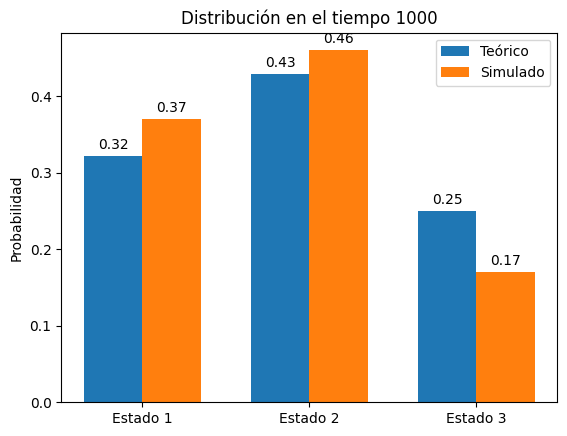

In [16]:
# Configurar etiquetas
labels = [f"Estado {estado}" for estado in estados]

# Crear un gráfico de barras
x = np.arange(len(estados))  # Posiciones en el eje x
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pi_n_teorico, width, label='Teórico')
rects2 = ax.bar(x + width/2, frecuencias_simuladas, width, label='Simulado')

# Añadir etiquetas y título
ax.set_ylabel('Probabilidad')
ax.set_title(f'Distribución en el tiempo {n}')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar las probabilidades encima de las barras
def autolabel(rects, data):
    for rect, d in zip(rects, data):
        height = rect.get_height()
        ax.annotate(f'{d:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, pi_n_teorico)
autolabel(rects2, frecuencias_simuladas)

plt.show()


### Preguntas
- ¿Cómo actua el parámetro $m$ en la estimación de las probabilidades?
- ¿Qué sucede si $n$ es muy grande?

**R**

El parámetro \( m \) en la estimación de probabilidades nos ayuda a obtener mayor **precisión**. A medida que aumentamos su valor, la **aproximación** mejora.  
Si \( n \) es muy grande y la cadena tiene una **distribución estacionaria**, esta se alcanzará gradualmente; sin embargo, un \( n \) grande aumenta la **complejidad computacional** y requiere un \( m \) suficientemente alto para no perder precisión.

## Ejercicio: Implementación de una Clase para Simular Cadenas de Markov

### Descripción General
Implementa una clase en Python llamada `CadenaMarkov` que permita simular cadenas de Markov discretas en el tiempo y con un número finito de estados. La clase debe incluir métodos para:

- Validar y establecer la matriz de transición.
- Simular la evolución de la cadena de Markov a lo largo de un número dado de pasos.
- Calcular teóricamente la distribución de probabilidad en el tiempo $𝑛$.
- Manejar errores comunes, como matrices de transición inválidas o distribuciones iniciales incorrectas.

In [35]:

class CadenaMarkov:
    def __init__(self, estados, P):
        if self._validar_matriz_transicion(P):
            self.estados = estados
            self.P = P
        else:
            raise ValueError("La matriz de transición no es válida.")

    def _validar_matriz_transicion(self, P):
        if len(P) != len(P[0]):
            return False
        for fila in P:
            if not np.isclose(sum(fila), 1):
                return False
        return True

    def simular_cadena_markov(self, estado_inicial, pasos):
        estado_actual = estado_inicial
        historial_estados = [estado_actual]
        estados = range(len(self.P))

        for _ in range(pasos):
            probabilidades = self.P[estado_actual]
            siguiente_estado = np.random.choice(estados, p=probabilidades)
            historial_estados.append(siguiente_estado)
            estado_actual = siguiente_estado

        return historial_estados

    def calcular_distribucion_n(self, pi_0, n):
        if not np.isclose(sum(pi_0), 1):
            raise ValueError("La distribución inicial no es válida.")

        P_n = np.linalg.matrix_power(self.P, n)
        pi_n = pi_0.dot(P_n)
        return pi_n


Vamos a evaluar la implementación de la clase `CadenaMarkov` aplicándola a un modelo de predicción del lenguaje, donde los estados son palabras. Utilizaremos un conjunto de palabras y construiremos la matriz de transición basada en un texto de ejemplo. Luego, utilizaremos la clase para simular el modelo y analizar los resultados.

## Modelo de Predicción del Lenguaje usando Cadenas de Markov
### **Descripción del Modelo**

En procesamiento del lenguaje natural (PLN), los modelos de Markov se utilizan para predecir la probabilidad de ocurrencia de una palabra dada la palabra anterior. En este caso, estamos implementando un modelo de **Markov de primer orden**, donde la probabilidad de una palabra depende únicamente de la palabra que la precede.

### **Pasos a Seguir**
1. Seleccionar un corpus de texto: Utilizaremos un texto de ejemplo para construir el modelo.

2. Extraer un conjunto de palabras: Elegiremos un número interesante de palabras para crear nuestro vocabulario.

3. Construir la matriz de transición: Calcularemos las probabilidades de transición entre palabras basadas en su co-ocurrencia en el texto.

4. Implementar y utilizar la clase CadenaMarkov: Aplicaremos la clase para simular el modelo y predecir secuencias de palabras.


1. Selección del Corpus de Texto
Para este ejemplo, utilizaremos un texto sencillo. Por ejemplo:

"El gato come pescado. El perro come carne. El gato y el perro son amigos. El pescado y la carne son comida."

In [82]:
palabras = ['el', 'gato', 'come', 'pescado', 'perro', 'carne', 'y', 'son', 'amigos', 'la', 'comida']


### Implementación del Conteo y Construcción de la Matriz de Transición

In [81]:
import numpy as np

# Lista de palabras del texto (sin signos de puntuación)
texto = ['el', 'gato', 'come', 'pescado', 'el', 'perro', 'come', 'carne',
         'el', 'gato', 'y', 'el', 'perro', 'son', 'amigos',
         'el', 'pescado', 'y', 'la', 'carne', 'son', 'comida',
         'diego', 'y ','polo', 'son ', 'amigos', 'chema ', 'tambien ', 'es', 'amigo']

# Vocabulario (palabras únicas)
palabras = list(set(texto))
n = len(palabras)

# Crear diccionarios para mapear palabras a índices y viceversa
palabra_a_indice = {palabra: i for i, palabra in enumerate(palabras)}
indice_a_palabra = {i: palabra for i, palabra in enumerate(palabras)}

# Inicializar matriz de conteo
C = np.zeros((n, n))

# Contar transiciones
for i in range(len(texto) - 1):
    palabra_actual = texto[i]
    palabra_siguiente = texto[i + 1]
    indice_actual = palabra_a_indice[palabra_actual]
    indice_siguiente = palabra_a_indice[palabra_siguiente]
    C[indice_actual, indice_siguiente] += 1

# Mostrar la matriz de conteo
print("Matriz de conteo C:")
print(C)


Matriz de conteo C:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 

### Convertir la Matriz de Conteo en Matriz de Transición
Para obtener la matriz de transición $𝑃$, dividimos cada fila de $𝐶$ por la suma de esa fila, obteniendo las probabilidades de transición.

**Matriz de Transición $𝑃$:** Contiene las probabilidades de que una palabra sea seguida por otra. Estas probabilidades se estiman a partir de las frecuencias de transición en el texto de entrenamiento.

In [83]:
# Inicializar matriz de transición
P = np.zeros((n, n))

for i in range(n):
    suma_fila = C[i].sum()
    if suma_fila > 0:
        P[i] = C[i] / suma_fila
    else:
        # Si una palabra nunca es seguida por otra, asignamos probabilidad uniforme
        P[i] = np.ones(n) / n

# Verificar que las filas de P suman 1
assert np.allclose(P.sum(axis=1), 1), "Las filas de P deben sumar 1"


### Interpretación de la Matriz de Transición
Probabilidades Condicionales: $𝑃_{𝑖𝑗}$ es la probabilidad de que la palabra $𝑗$ siga a la palabra $𝑖$.

Ejemplo: Si en el texto, la palabra 'el' es seguida por 'gato' con frecuencia alta, entonces
$𝑃_{``el",``gato"}$ será alta.

### Simulación de la Cadena de Markov
Elegimos una palabra inicial y simulamos una secuencia de palabras.

Al simular la cadena, estamos generando secuencias de palabras donde la siguiente palabra se elige basándose en la palabra actual y las probabilidades de transición.

In [ ]:
# Usar la clase CadenaMarkov

In [84]:
# Inicializar la cadena de Markov
cadena = CadenaMarkov(estados=palabras, P=P)

# Elegir una lista de palabras iniciales
palabras_iniciales = ['el', 'gato', 'come', 'pescado', 'perro', 'carne', 'y', 'son', 'amigos', 'la', 'comida']

# Número de palabras a generar
pasos = 100

# Simular la cadena de Markov para cada palabra inicial
for palabra_inicial in palabras_iniciales:
    # Convertir la palabra inicial a su índice correspondiente
    indice_inicial = palabra_a_indice[palabra_inicial]

    # Simular la cadena de Markov
    historial_indices = cadena.simular_cadena_markov(estado_inicial=indice_inicial, pasos=pasos)

    # Convertir los índices generados a palabras
    historial_palabras = [indice_a_palabra[i] for i in historial_indices]

    # Mostrar la secuencia generada
    print(f"Secuencia generada a partir de '{palabra_inicial}':")
    print(' '.join(historial_palabras))


Secuencia generada a partir de 'el':
el pescado y el perro come carne son comida diego y  polo son  amigos chema  tambien  es amigo el gato come carne el gato come carne son comida diego y  polo son  amigos chema  tambien  es amigo amigos el perro son amigos el gato y la carne son amigos chema  tambien  es amigo y  polo son  amigos chema  tambien  es amigo comida diego y  polo son  amigos chema  tambien  es amigo la carne son comida diego y  polo son  amigos el gato come carne el perro son amigos el pescado el perro come pescado y el perro come pescado el gato
Secuencia generada a partir de 'gato':
gato y el perro son amigos el gato come pescado y la carne el pescado el perro come carne el gato y el perro son comida diego y  polo son  amigos el gato y la carne el gato come pescado y la carne son amigos el gato y la carne el perro come pescado y el perro son amigos el perro come carne son amigos el perro son amigos chema  tambien  es amigo tambien  es amigo gato come pescado el perro so

### Preguntas
- Implementa el modelo para distintas palabras iniciales y analiza si las oraciones generadas tienen sentido.

**En este caso las oraciones tienen un poco más de sentido, pues son pocas palabras y todas se parecen, ademas agregue otras palabras entonces estan chistosas las oraciones**
- Implementa el modelo para el siguiente texto y contesta la pregunta de punto anterior de nuevo:

**El programa esta implementado más abajo, pero en realidad no tiene mucho sentido las oraciones si las comparamos en el mundo real, pero analiticamente, tiene mucho sentido de aparecer en ese orden, pues en el texto es parecido**

En un lugar de la Mancha, de cuyo nombre no quiero acordarme, vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Este hidalgo, en sus ratos de ocio, se dedicaba a leer libros de caballerías, con tanta afición y gusto que olvidó casi por completo el ejercicio de la caza y el cuidado de su hacienda. Su imaginación se llenó de todo aquello que leía, hasta tal punto que llegó a perder el juicio y decidió convertirse en caballero andante. Preparó sus armas, limpió su vieja armadura, nombró a su rocín como Rocinante y salió en busca de aventuras por los caminos de España. En su camino, encontró molinos de viento, que en su locura confundió con gigantes, y así comenzó una serie de desventuras que lo harían famoso en toda la región.

In [88]:
import numpy as np
import re

# Texto de entrenamiento
texto_entrenamiento = """
En un lugar de la Mancha, de cuyo nombre no quiero acordarme, vivía un hidalgo de los de lanza en astillero,
adarga antigua, rocín flaco y galgo corredor. Este hidalgo, en sus ratos de ocio, se dedicaba a leer libros
de caballerías, con tanta afición y gusto que olvidó casi por completo el ejercicio de la caza y el cuidado
de su hacienda. Su imaginación se llenó de todo aquello que leía, hasta tal punto que llegó a perder el juicio
y decidió convertirse en caballero andante. Preparó sus armas, limpió su vieja armadura, nombró a su rocín como
Rocinante y salió en busca de aventuras por los caminos de España. En su camino, encontró molinos de viento, que
en su locura confundió con gigantes, y así comenzó una serie de desventuras que lo harían famoso en toda la región.
"""

# Preprocesamiento del texto
def preprocesar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar signos de puntuación
    texto = re.sub(r'[^\w\s]', '', texto)
    # Dividir en palabras
    palabras = texto.split()
    return palabras

# Obtener la lista de palabras
palabras_texto = preprocesar_texto(texto_entrenamiento)
help(re.sub)

Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the Match object and must return
    a replacement string to be used.



In [89]:
# Vocabulario (palabras únicas)
vocabulario = list(set(palabras_texto))
n = len(vocabulario)

print(f"Total de palabras en el texto: {len(palabras_texto)}")
print(f"Tamaño del vocabulario: {n}")

Total de palabras en el texto: 140
Tamaño del vocabulario: 93


### Construcción de la Matriz de Transición
**Paso 1:** Mapeo de Palabras a Índices

In [90]:
# Crear diccionarios para mapear palabras a índices y viceversa
palabra_a_indice = {palabra: i for i, palabra in enumerate(vocabulario)}
indice_a_palabra = {i: palabra for palabra, i in palabra_a_indice.items()}


**Paso 2:** Contar Transiciones entre Palabras

In [91]:
# Inicializar matriz de conteo
C = np.zeros((n, n))

# Contar transiciones
for i in range(len(palabras_texto) - 1):
    palabra_actual = palabras_texto[i]
    palabra_siguiente = palabras_texto[i + 1]
    indice_actual = palabra_a_indice[palabra_actual]
    indice_siguiente = palabra_a_indice[palabra_siguiente]
    C[indice_actual, indice_siguiente] += 1
print(C)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Paso 3:** Convertir la Matriz de Conteo en Matriz de Transición


In [92]:
# Inicializar matriz de transición
P = np.zeros((n, n))

for i in range(n):
    suma_fila = C[i].sum()
    if suma_fila > 0:
        P[i] = C[i] / suma_fila
    else:
        # Si una palabra nunca es seguida por otra, asignamos probabilidad uniforme
        P[i] = np.ones(n) / n

# Verificar que las filas de P suman 1
assert np.allclose(P.sum(axis=1), 1), "Las filas de P deben sumar 1"
print(P)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [93]:
#Implementacion en texto
cadena_texto = CadenaMarkov(estados=vocabulario, P=P)
estado_inicial = 'en'
indice_inicial = palabra_a_indice[estado_inicial]
pasos = 50
simular = cadena_texto.simular_cadena_markov(estado_inicial=indice_inicial, pasos=pasos)
historial_palabras = [indice_a_palabra[i] for i in simular]
print("Secuencia generada:")
print(' '.join(historial_palabras))

Secuencia generada:
en su camino encontró molinos de la mancha de su rocín como rocinante y galgo corredor este hidalgo en sus armas limpió su rocín flaco y el juicio y decidió convertirse en su hacienda su vieja armadura nombró a leer libros de cuyo nombre no quiero acordarme vivía un hidalgo de


# Ejemplo: Algoritmo Page Rank

El algoritmo *PageRank*, es una aplicación práctica de las cadenas de Markov. Modela la navegación de un usuario a través de páginas web como una cadena de Markov, donde las páginas son los estados y los enlaces son las probabilidades de transición.

Supongamos que tenemos cuatro páginas web: A, B, C y D. Las conexiones entre ellas son:

- A enlaza a B y C.
- B enlaza a C.
- C enlaza a A.
- D enlaza a C.

Podemos representar estas conexiones mediante una matriz de adyacencia y luego convertirla en una matriz de transición estocástica.

In [98]:
import numpy as np

# Definir las páginas
paginas = ['A', 'B', 'C', 'D']
n = len(paginas)

# Matriz de adyacencia
L = np.array([
    [0, 1, 1, 0],  # A
    [0, 0, 1, 0],  # B
    [1, 0, 0, 0],  # C
    [0, 0, 1, 0]   # D
])


## El Factor de Amortiguación en PageRank
- ¿Qué es el factor de amortiguación?

El factor de amortiguación, denotado comúnmente como $𝑑$, es un valor entre $0$ y $1$ que representa la probabilidad de que un usuario continúe navegando siguiendo los enlaces de las páginas, en lugar de "teletransportarse" a una página aleatoria. En el algoritmo original de PageRank, se suele utilizar $𝑑=0.85$.

- ¿Por qué es necesario?

**Evitar sumideros y ciclos:** En una web real, es posible encontrar páginas sin enlaces salientes (sumideros) o ciclos cerrados. Sin el factor de amortiguación, estos elementos pueden llevar a que el PageRank no converja correctamente.

**Modelo más realista:** Los usuarios no siempre siguen enlaces; a veces escriben una URL directamente o usan marcadores. El factor de amortiguación introduce la posibilidad de saltar a cualquier página del sistema.


 Conversión de la Matriz de Adyacencia a Matriz Estocástica
Matriz de Adyacencia ($L$)
Es una representación de las conexiones directas entre las páginas. Si la página $𝑖$ enlaza a la página $𝑗$, entonces $𝐿_{𝑖𝑗}=1$, de lo contrario, $𝐿_{𝑖𝑗}=0$.

- Problema con la matriz de adyacencia
La matriz $𝐿$ no es estocástica (las filas no suman 1), por lo que no puede ser utilizada directamente como matriz de transición en una cadena de Markov.

- Creación de la Matriz de Transición Estocástica ($P$)
La matriz de transición $𝑃$ es una matriz estocástica donde cada elemento $𝑃_{𝑖𝑗}$ representa la probabilidad de transitar de la página $𝑖$ a la página $𝑗$.

- Sin factor de amortiguación
Inicialmente, podríamos intentar convertir $𝐿$ en una matriz estocástica dividiendo cada elemento de una fila por la suma de esa fila:
$$
P_{ij}=\frac{L_{ij}}{\sum_k L_{ik}}
$$

Pero esto presenta problemas:

**Páginas sin enlaces salientes:** Si una página no tiene enlaces salientes ($\sum_k L_{ik}=0$), la división no es posible.

**Sumideros:** Páginas sin enlaces salientes pueden causar que el algoritmo no converja.

- Introducción del factor de amortiguación
Para resolver estos problemas, utilizamos el factor de amortiguación $𝑑$ y modificamos la matriz de transición:
$$
P_{ij}=d\times \left(\frac{L_{ij}}{\sum_k L_{ik}}\right)+\left(\frac{1-d}{n}\right)
$$

- Primer término: Representa la probabilidad de seguir un enlace desde la página actual.
- Segundo término: Representa la probabilidad de "teletransportarse" a cualquier otra página del conjunto.

Este ajuste garantiza que incluso si una página no tiene enlaces salientes, la matriz $𝑃$ seguirá siendo estocástica y permitirá al usuario saltar a cualquier página con igual probabilidad.

In [102]:
# Factor de amortiguación
d = 0.85

# Crear matriz de transición
P = np.zeros((n, n))
for i in range(n):
    enlaces_salientes = L[i, :]
    suma_enlaces = enlaces_salientes.sum()
    if suma_enlaces == 0:
        P[i, :] = 1.0 / n
    else:
        P[i, :] = d * (enlaces_salientes / suma_enlaces) + ((1 - d) / n)

El PageRank es un vector $𝑃𝑅$ que representa la importancia relativa de cada página. Se calcula iterativamente hasta que converge a un valor estable.

**Paso 1:** Inicialización del Vector PageRank
Comenzamos con un vector de PageRank inicial uniforme:
$$
PR^{(0)}=\left[\frac{1}{n},\frac{1}{n},\dots,\frac{1}{n}\right]
$$

In [103]:
# Vector PageRank inicial
PR = np.ones(n) / n

**Paso 2:** Iteración del Algoritmo
El vector PageRank se actualiza iterativamente utilizando la ecuación:
$$
PR^{(k+1)}=PR^{(k)}\times P \text{   (Multiplicación de matrices})
$$

Continuamos iterando hasta que la diferencia entre $PR^{(k+1)}$ y $PR^{(k)}$ sea menor que un umbral $𝜖$.

In [104]:
# Parámetros de iteración
epsilon = 1e-6
delta = 1
iteraciones = 0

# Iteración
while delta > epsilon:
    PR_nuevo = PR.dot(P)
    delta = np.linalg.norm(PR_nuevo - PR)
    PR = PR_nuevo
    iteraciones += 1

print(f"Convergencia alcanzada en {iteraciones} iteraciones.\n")

# Resultados
for i, pagina in enumerate(paginas):
    print(f"PageRank de {pagina}: {PR[i]:.4f}")


Convergencia alcanzada en 28 iteraciones.

PageRank de A: 0.3725
PageRank de B: 0.1958
PageRank de C: 0.3941
PageRank de D: 0.0375


## Simulación de la navegación

La **simulación de la navegación** implica modelar el comportamiento de un usuario que navega por las páginas web siguiendo las probabilidades de transición definidas en la matriz de transición. Esto se hace realizando **caminatas aleatorias** (random walks) a lo largo de la red, registrando las visitas a cada página.

In [105]:
def simular_navegacion(P, estado_inicial, pasos):
    estado_actual = estado_inicial
    historial_estados = [estado_actual]

    for _ in range(pasos):
        probabilidades = P[estado_actual]
        siguiente_estado = np.random.choice(n, p=probabilidades)
        historial_estados.append(siguiente_estado)
        estado_actual = siguiente_estado

    return historial_estados


In [107]:
# Parámetros de la simulación
estado_inicial = 0  # Comenzar en la página A
pasos = 28

# Simular navegación
historial = simular_navegacion(P, estado_inicial, pasos)

# Calcular frecuencias de visita
visitas = np.zeros(n)
for estado in historial:
    visitas[estado] += 1
frecuencias = visitas / len(historial)

# Mostrar frecuencias
print("\nFrecuencias de visita simuladas:")
for i, pagina in enumerate(paginas):
    print(f"{pagina}: {frecuencias[i]:.4f}")
print(visitas)
print(frecuencias)


Frecuencias de visita simuladas:
A: 0.3793
B: 0.1724
C: 0.4483
D: 0.0000
[11.  5. 13.  0.]
[0.37931034 0.17241379 0.44827586 0.        ]


Implementa el algoritmo para las siguientes datos:

In [124]:
paginas = ['A', 'B', 'C', 'D', 'E', 'F']
n = len(paginas)

# Matriz de adyacencia
L = np.array([
    [0, 1, 1, 1, 0, 0],  # A
    [0, 0, 1, 0, 1, 0],  # B
    [1, 0, 0, 0, 0, 1],  # C
    [0, 0, 1, 0, 0, 0],  # D
    [0, 0, 0, 0, 0, 1],  # E
    [0, 0, 0, 0, 0, 0]   # F (sumidero)
])

P = np.zeros((n, n))
for i in range(n):
    enlaces_salientes = L[i, :]
    suma_enlaces = enlaces_salientes.sum()
    if suma_enlaces == 0:
        P[i, :] = 1.0 / n
    else:
        P[i, :] = d * (enlaces_salientes / suma_enlaces) + ((1 - d) / n)
PR = np.ones(n) / n
# Parámetros de iteración
epsilon = 1e-6
delta = 1
iteraciones = 0

# Iteración
while delta > epsilon:
    PR_nuevo = PR.dot(P)
    delta = np.linalg.norm(PR_nuevo - PR)
    PR = PR_nuevo
    iteraciones += 1

print(f"Convergencia alcanzada en {iteraciones} iteraciones.\n")

# Resultados
for i, pagina in enumerate(paginas):
    print(f"PageRank de {pagina}: {PR[i]:.4f}")



estado_inicial = 0  # Comenzar en la página A
pasos = 24

# Simular navegación
historial = simular_navegacion(P, estado_inicial, pasos)

# Calcular frecuencias de visita
visitas = np.zeros(n)
for estado in historial:
    visitas[estado] += 1
frecuencias = visitas / len(historial)

# Mostrar frecuencias
print("\nFrecuencias de visita simuladas:")
for i, pagina in enumerate(paginas):
    print(f"{pagina}: {frecuencias[i]:.4f}")


Convergencia alcanzada en 24 iteraciones.

PageRank de A: 0.1671
PageRank de B: 0.1090
PageRank de C: 0.2480
PageRank de D: 0.1090
PageRank de E: 0.1080
PageRank de F: 0.2589

Frecuencias de visita simuladas:
A: 0.3600
B: 0.0400
C: 0.3200
D: 0.1600
E: 0.0000
F: 0.1200


In [123]:
import numpy as np

# Matriz de adyacencia para 10 páginas
L = np.array([
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 1],  # A enlaza a B, E y J
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # B enlaza a A y C
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # C enlaza a B y D
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],  # D enlaza a C y E
    [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],  # E enlaza a A, D y F
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],  # F enlaza a E y G
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],  # G enlaza a F y H
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # H enlaza a G y I
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # I enlaza a H y J
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]   # J enlaza a A y I
])
n = len(L)
d = 0.85

# Crear matriz de transición
P = np.zeros((n, n))
for i in range(n):
    enlaces_salientes = L[i, :]
    suma_enlaces = enlaces_salientes.sum()
    if suma_enlaces == 0:
        P[i, :] = 1.0 / n
    else:
        P[i, :] = d * (enlaces_salientes / suma_enlaces) + ((1 - d) / n)
PR = np.ones(n) / n
# Parámetros de iteración
epsilon = 1e-6
delta = 1
iteraciones = 0

# Iteración
while delta > epsilon:
    PR_nuevo = PR.dot(P)
    delta = np.linalg.norm(PR_nuevo - PR)
    PR = PR_nuevo
    iteraciones += 1

print(f"Convergencia alcanzada en {iteraciones} iteraciones.\n")

# Resultados
for i, pagina in enumerate(paginas):
    print(f"PageRank de {pagina}: {PR[i]:.4f}")



estado_inicial = 0  # Comenzar en la página A
pasos = 40

# Simular navegación
historial = simular_navegacion(P, estado_inicial, pasos)

# Calcular frecuencias de visita
visitas = np.zeros(n)
for estado in historial:
    visitas[estado] += 1
frecuencias = visitas / len(historial)

# Mostrar frecuencias
print("\nFrecuencias de visita simuladas:")
for i, pagina in enumerate(paginas):
    print(f"{pagina}: {frecuencias[i]:.4f}")


Convergencia alcanzada en 40 iteraciones.

PageRank de A: 0.1292
PageRank de B: 0.0908
PageRank de C: 0.0922
PageRank de D: 0.0908
PageRank de E: 0.1292
PageRank de F: 0.0918

Frecuencias de visita simuladas:
A: 0.0976
B: 0.0000
C: 0.1220
D: 0.1707
E: 0.0732
F: 0.1463


In [125]:
import numpy as np

# Número de páginas
n = 50

# Probabilidad de que exista un enlace entre dos páginas
probabilidad_enlace = 0.05  # Ajusta este valor entre 0 y 1 para cambiar la densidad

# Inicializar la matriz de adyacencia con ceros
L = np.zeros((n, n), dtype=int)

# Generar enlaces aleatorios
np.random.seed(42)  # Semilla para reproducibilidad

for i in range(n):
    for j in range(n):
        if i != j:
            if np.random.rand() < probabilidad_enlace:
                L[i, j] = 1  # Existe un enlace de la página i a la página j

# Verificar si alguna fila es un sumidero (sin enlaces salientes)
for i in range(n):
    if L[i].sum() == 0:
        # Si es un sumidero, añadimos un enlace aleatorio
        j = np.random.choice([k for k in range(n) if k != i])
        L[i, j] = 1

# Mostrar la matriz de adyacencia
print("Matriz de adyacencia L:")
print(L)

# Parámetros de PageRank
d = 0.85  # Factor de amortiguamiento
P = np.zeros((n, n))

# Crear la matriz de transición P
for i in range(n):
    enlaces_salientes = L[i, :]
    suma_enlaces = enlaces_salientes.sum()
    if suma_enlaces == 0:
        P[i, :] = 1.0 / n
    else:
        P[i, :] = d * (enlaces_salientes / suma_enlaces) + ((1 - d) / n)

# Inicializar el vector de PageRank
PR = np.ones(n) / n

# Parámetros de iteración
epsilon = 1e-6
delta = 1
iteraciones = 0

# Iteración de PageRank
while delta > epsilon:
    PR_nuevo = PR.dot(P)
    delta = np.linalg.norm(PR_nuevo - PR)
    PR = PR_nuevo
    iteraciones += 1

print(f"\nConvergencia alcanzada en {iteraciones} iteraciones.\n")

# Resultados de PageRank
for i in range(10):  # Mostrar los primeros 10 resultados de PageRank
    print(f"PageRank de la página {i}: {PR[i]:.4f}")

# Función para simular la navegación
def simular_navegacion(P, estado_inicial, pasos):
    historial = [estado_inicial]
    for _ in range(pasos - 1):
        estado_actual = historial[-1]
        siguiente_estado = np.random.choice(range(len(P)), p=P[estado_actual])
        historial.append(siguiente_estado)
    return historial

# Simular navegación desde la página A (estado 0)
estado_inicial = 0  # Comenzar en la página A
pasos = 100  # Número de pasos de navegación

# Simular navegación
historial = simular_navegacion(P, estado_inicial, pasos)

# Calcular frecuencias de visita
visitas = np.zeros(n)
for estado in historial:
    visitas[estado] += 1
frecuencias = visitas / len(historial)

# Mostrar frecuencias de visita simuladas
print("\nFrecuencias de visita simuladas:")
for i in range(10):  # Mostrar las primeras 10 frecuencias de visita
    print(f"Página {i}: {frecuencias[i]:.4f}")


Matriz de adyacencia L:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Convergencia alcanzada en 23 iteraciones.

PageRank de la página 0: 0.0073
PageRank de la página 1: 0.0122
PageRank de la página 2: 0.0030
PageRank de la página 3: 0.0233
PageRank de la página 4: 0.0108
PageRank de la página 5: 0.0079
PageRank de la página 6: 0.0030
PageRank de la página 7: 0.0074
PageRank de la página 8: 0.0283
PageRank de la página 9: 0.0453

Frecuencias de visita simuladas:
Página 0: 0.0100
Página 1: 0.0100
Página 2: 0.0100
Página 3: 0.0000
Página 4: 0.0000
Página 5: 0.0000
Página 6: 0.0100
Página 7: 0.0000
Página 8: 0.0100
Página 9: 0.0500


## Preguntas

- ¿Cómo afecta la estructura de enlaces entre las páginas al valor del PageRank de cada una? Identifica qué páginas tienen un PageRank más alto y explica por qué.
- Observa que página tiene el mayor PageRank. ¿Es esto debido al número de enlaces entrantes o a la importancia de las páginas que la enlazan?
-¿Qué sucede con los valores de PageRank al variar el factor de amortiguación $𝑑$? Prueba con $𝑑=0.9$ y $𝑑=0.5$.
- ¿Qué sucede con los valores al reducir
$𝑑$. Discute la interpretación.
- En la primer matriz, la página F no tiene enlaces salientes. ¿Cómo maneja el algoritmo PageRank las páginas sumidero y cuál es su impacto en el cálculo?
- Haz una grafica comparando la convergencia del algoritmo y la simulación de la navegación. ¿Cómo afecta el número de páginas a la convergencia?  






1. **¿Cómo afecta la estructura de enlaces entre las páginas al valor del PageRank de cada una? Identifica qué páginas tienen un PageRank más alto y explica por qué.**

El PageRank de una página depende mucho de los enlaces que recibe. Si una página tiene más enlaces de otras con alto PageRank, su valor sube, porque esos enlaces transfieren parte de su autoridad. En resumen, las páginas con más enlaces de páginas importantes tienen un PageRank más alto, no solo por la cantidad de enlaces, sino por la relevancia de los sitios que las enlazan.

2. **¿Qué pasa con la página que tiene el mayor PageRank? ¿Es por los enlaces entrantes o la importancia de las páginas que la enlazan?**

La página con el mayor PageRank normalmente recibe enlaces de páginas influyentes. No es solo el número de enlaces lo que cuenta, sino la calidad de las páginas que enlazan. Si una página importante enlaza a una página, esa página ganará más peso en su PageRank que si recibe muchos enlaces de sitios menos relevantes.

3. **¿Qué pasa con los valores de PageRank si cambiamos el factor \( d \)? ¿Qué ocurre con \( d = 0.9 \) y \( d = 0.5 \)?**

Cuando \( d \) es alto (como \( d = 0.9 \)), el algoritmo le da más peso a los enlaces entre páginas. Si bajamos \( d \) (por ejemplo, a \( d = 0.5 \)), la probabilidad de saltar aleatoriamente aumenta, lo que hace que el PageRank se distribuya de manera más uniforme y las conexiones directas pierdan peso. Entonces, con valores más bajos de \( d \), el PageRank de las páginas tiende a equilibrarse más.

4. **¿Qué pasa si reducimos \( d \)?**

Reducir \( d \) hace que el algoritmo no dependa tanto de los enlaces, y las páginas con menos conexiones directas no se ven tan afectadas. Básicamente, el sistema se vuelve más equilibrado y menos centrado en las páginas muy conectadas. Es como si el PageRank estuviera menos enfocado en los enlaces directos y más en una navegación más aleatoria.

5. **En la primera matriz, la página F no tiene enlaces salientes. ¿Cómo maneja el algoritmo PageRank las páginas sin enlaces salientes?**

Las páginas sin enlaces salientes (sumideros) son un problema porque podrían acumular PageRank sin poder repartirlo. El algoritmo maneja esto redistribuyendo su PageRank de manera uniforme a otras páginas, evitando que se quede atrapado en esas páginas. Esto asegura que el cálculo siga funcionando bien sin que se queden valores perdidos.

6. **Grafica la convergencia del algoritmo y la simulación de la navegación. ¿Cómo afecta el número de páginas a la convergencia?**

A medida que aumenta el número de páginas, el algoritmo tarda más en converger porque hay más relaciones que procesar. En una simulación de navegación, también se hace más lento con más páginas, porque las opciones de navegación crecen. Así que, con más páginas, la convergencia se vuelve más lenta, ya que hay más iteraciones y cálculos para hacer que todo se estabilice.